<a href="https://colab.research.google.com/github/SrKoalo/challenge_alura_store/blob/main/AluraStoreBrLucasDeFrancaCardoso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [152]:
fl1 = round(sum(loja['Preço']),2)
fl2 = round(sum(loja2['Preço']),2)
fl3 = round(sum(loja3['Preço']),2)
fl4 = round(sum(loja4['Preço']),2)


In [153]:
print(f"Faturamento da Loja 1: {fl1}")
print(f"Faturamento da Loja 2: {fl2}")
print(f"Faturamento da Loja 3: {fl3}")
print(f"Faturamento da Loja 4: {fl4}")

Faturamento da Loja 1: 1534509.12
Faturamento da Loja 2: 1488459.06
Faturamento da Loja 3: 1464025.03
Faturamento da Loja 4: 1384497.58


# 2. Vendas por Categoria


In [30]:
cat_loja1 = loja['Categoria do Produto'].value_counts()
cat_loja2 = loja2['Categoria do Produto'].value_counts()
cat_loja3 = loja3['Categoria do Produto'].value_counts()
cat_loja4 = loja4['Categoria do Produto'].value_counts()

In [32]:
print(f'Loja 1: {cat_loja1}\n')
print(f'Loja 2: {cat_loja2}\n')
print(f'Loja 3: {cat_loja3}\n')
print(f'Loja 4: {cat_loja4}\n')

Loja 1: Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Loja 2: Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Loja 3: Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Loja 4: Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer     

# 3. Média de Avaliação das Lojas

In [42]:
media_loja1 = sum(loja['Avaliação da compra']) / len(loja['Avaliação da compra'])
media_loja2 = sum(loja2['Avaliação da compra']) / len(loja2['Avaliação da compra'])
media_loja3 = sum(loja3['Avaliação da compra']) / len(loja3['Avaliação da compra'])
media_loja4 = sum(loja4['Avaliação da compra']) / len(loja4['Avaliação da compra'])


In [43]:
print(f'Média de avaliações da Loja 1: {media_loja1:.2f}')
print(f'Média de avaliações da Loja 2: {media_loja2:.2f}')
print(f'Média de avaliações da Loja 3: {media_loja3:.2f}')
print(f'Média de avaliações da Loja 4: {media_loja4:.2f}')

Média de avaliações da Loja 1: 3.98
Média de avaliações da Loja 2: 4.04
Média de avaliações da Loja 3: 4.05
Média de avaliações da Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [121]:
def print_mais_e_menos(nome_loja, vendas):
    max_vendas = vendas.iloc[0]
    min_vendas = vendas.iloc[-1]

    mais_vendidos = vendas[vendas == max_vendas].index.tolist()
    menos_vendidos = vendas[vendas == min_vendas].index.tolist()

    print(f"{nome_loja}:")
    print(f"  Produtos mais vendidos ({max_vendas}): {', '.join(mais_vendidos)}")
    print(f"  Produtos menos vendidos ({min_vendas}): {', '.join(menos_vendidos)}")

mais_e_menos_loja1 = loja['Produto'].value_counts()
mais_e_menos_loja2 = loja2['Produto'].value_counts()
mais_e_menos_loja3 = loja3['Produto'].value_counts()
mais_e_menos_loja4 = loja4['Produto'].value_counts()

In [191]:
print_mais_e_menos("Loja 1", mais_e_menos_loja1)
print_mais_e_menos("Loja 2", mais_e_menos_loja2)
print_mais_e_menos("Loja 3", mais_e_menos_loja3)
print_mais_e_menos("Loja 4", mais_e_menos_loja4)

Loja 1:
  Produtos mais vendidos (60): Micro-ondas, TV Led UHD 4K, Guarda roupas
  Produtos menos vendidos (33): Headset, Celular ABXY
Loja 2:
  Produtos mais vendidos (65): Iniciando em programação
  Produtos menos vendidos (32): Jogo de tabuleiro
Loja 3:
  Produtos mais vendidos (57): Kit banquetas
  Produtos menos vendidos (35): Blocos de montar
Loja 4:
  Produtos mais vendidos (62): Cama box
  Produtos menos vendidos (33): Guitarra


# 5. Frete Médio por Loja


In [127]:
media_frete_loja1 = sum(loja['Frete']) / len(loja['Frete'])
media_frete_loja2 = sum(loja2['Frete']) / len(loja2['Frete'])
media_frete_loja3 = sum(loja3['Frete']) / len(loja3['Frete'])
media_frete_loja4 = sum(loja4['Frete']) / len(loja4['Frete'])

In [128]:
print(f'Média de frete da Loja 1: {media_frete_loja1:.2f}')
print(f'Média de frete da Loja 2: {media_frete_loja2:.2f}')
print(f'Média de frete da Loja 3: {media_frete_loja3:.2f}')
print(f'Média de frete da Loja 4: {media_frete_loja4:.2f}')

Média de frete da Loja 1: 34.69
Média de frete da Loja 2: 33.62
Média de frete da Loja 3: 33.07
Média de frete da Loja 4: 31.28


## Relatório

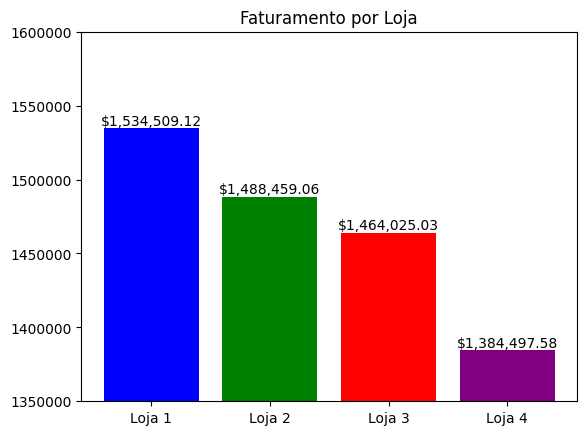

In [204]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import locale



faturamentos = [fl1, fl2, fl3, fl4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
colors = ['blue', 'green', 'red', 'purple'] # Define a list of colors
bars = plt.bar(lojas, faturamentos, color=colors) # Pass the colors to the bar function
plt.title('Faturamento por Loja')
plt.ylim(1350000, 1600000)
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False, useMathText=False))
plt.ticklabel_format(style='plain', axis='y')

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    # Format as currency using locale
    currency_format = locale.currency(yval, grouping=True, symbol=True)
    plt.text(bar.get_x() + bar.get_width()/2, yval, currency_format, va='bottom', ha='center') # va: vertical alignment, ha: horizontal alignment

plt.show()

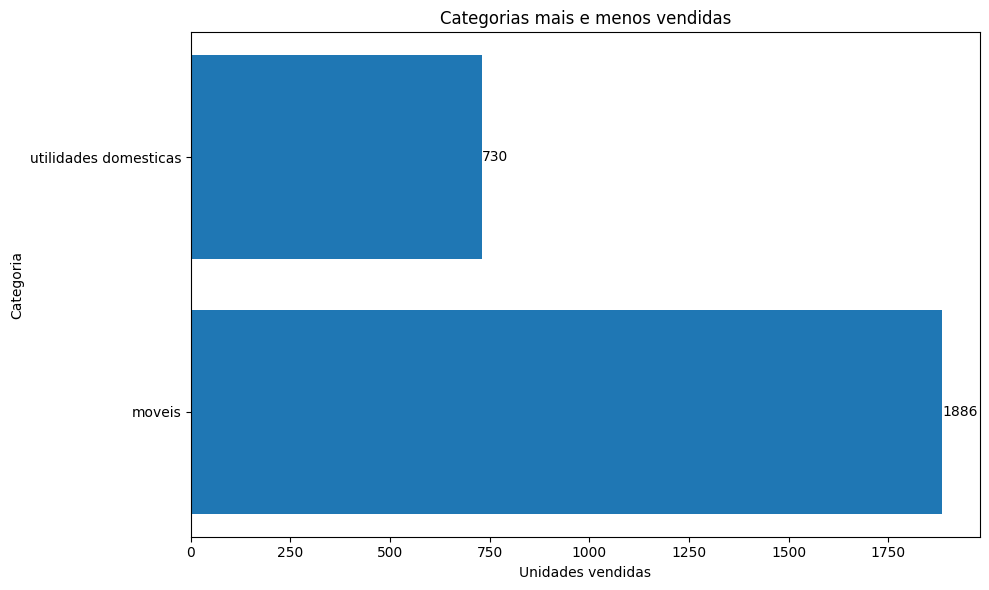

In [225]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure all_stores dataframe exists (assuming it was created in a previous cell)
if 'all_stores' not in locals():
    all_stores = pd.concat([loja, loja2, loja3, loja4])

# Get overall most and least sold product categories
overall_category_counts = all_stores['Categoria do Produto'].value_counts()
most_sold_categories = overall_category_counts[overall_category_counts == overall_category_counts.iloc[0]].index.tolist()
least_sold_categories = overall_category_counts[overall_category_counts == overall_category_counts.iloc[-1]].index.tolist()

# Filter the category counts for only the most and least sold categories
filtered_categories = overall_category_counts.loc[most_sold_categories + least_sold_categories]

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(filtered_categories.index, filtered_categories.values)

plt.title('Categorias mais e menos vendidas')
plt.xlabel('Unidades vendidas')
plt.ylabel('Categoria')


# Add values on the bars
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, xval, va='center', ha='left')


plt.tight_layout()
plt.show()

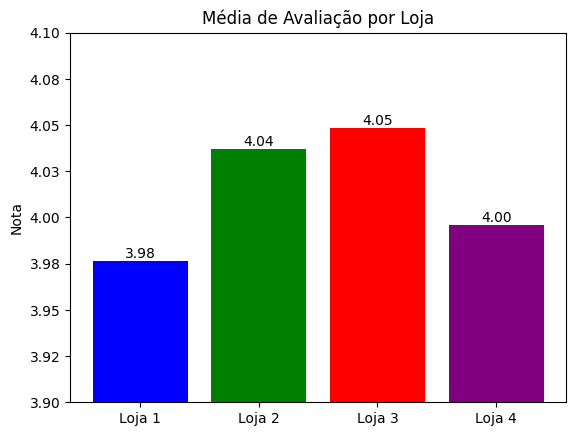

In [215]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

medias_avaliacao = [media_loja1, media_loja2, media_loja3, media_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
colors = ['blue', 'green', 'red', 'purple'] # Same colors as previous plots

bars = plt.bar(lojas, medias_avaliacao, color=colors)
plt.title('Média de Avaliação por Loja')
plt.ylabel('Nota')
plt.ylim(3.9, 4.1) # Adjust y-axis limits for better visualization of small differences

# Format y-axis labels to two decimal places
formatter = mticker.FormatStrFormatter('%.2f')
plt.gca().yaxis.set_major_formatter(formatter)


# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center')

plt.show()

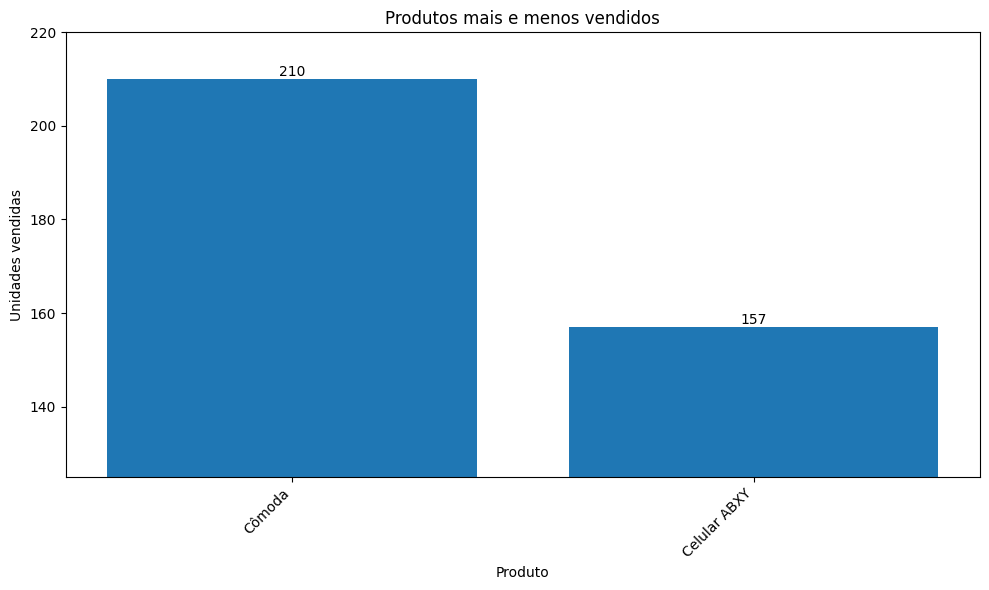

In [228]:
import matplotlib.pyplot as plt
import pandas as pd

# Concatenate all store dataframes
all_stores = pd.concat([loja, loja2, loja3, loja4])

# Get overall most and least sold products
overall_sales_counts = all_stores['Produto'].value_counts()
most_sold_products = overall_sales_counts[overall_sales_counts == overall_sales_counts.iloc[0]].index.tolist()
least_sold_products = overall_sales_counts[overall_sales_counts == overall_sales_counts.iloc[-1]].index.tolist()

# Filter the sales counts for only the most and least sold products
filtered_sales = overall_sales_counts.loc[most_sold_products + least_sold_products]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(filtered_sales.index, filtered_sales.values)

plt.title('Produtos mais e menos vendidos')
plt.xlabel('Produto')
plt.ylabel('Unidades vendidas')
plt.ylim(125, 220)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, va='bottom', ha='center')


plt.tight_layout()
plt.show()

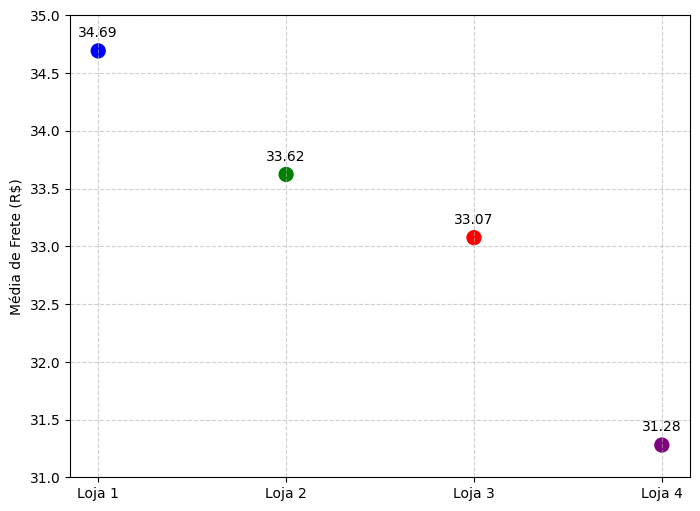

In [239]:
import matplotlib.pyplot as plt

medias_frete = [media_frete_loja1, media_frete_loja2, media_frete_loja3, media_frete_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
colors = ['blue', 'green', 'red', 'purple'] # Same colors as previous plots

plt.figure(figsize=(8, 6))
plt.scatter(lojas, medias_frete, color=colors, s=100) # Create a scatter plot with different colors and marker size
plt.ylabel('Média de Frete (R$)')
plt.ylim(31, 35) # Adjust y-axis limits for better visualization of small differences


# Add values next to each point
for i, txt in enumerate(medias_frete):
    plt.annotate(f'{txt:.2f}', (lojas[i], medias_frete[i]), textcoords="offset points", xytext=(0,10), ha='center') # Add text annotation


plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Relatório Final: Análise de Desempenho das Lojas para Decisão de Venda

Este relatório tem como objetivo analisar o desempenho de quatro lojas da rede Alura Store com base em métricas de vendas, desempenho e avaliações, a fim de identificar a loja com menor eficiência para ser vendida, liberando recursos para um novo empreendimento do Senhor João.

**Análise dos Dados e Visualizações:**

Realizamos uma análise detalhada dos dados de cada loja, utilizando visualizações para facilitar a compreensão. Os principais insights obtidos são apresentados a seguir, com referência aos gráficos gerados anteriormente no notebook:

*   **Faturamento Total:** O gráfico de barras de "Faturamento por Loja" mostra claramente que a Loja 1 apresenta o maior faturamento, seguida pela Loja 2, Loja 3 e, por último, a Loja 4. Um menor faturamento pode ser um indicador de menor eficiência na geração de receita.

*   **Categorias de Produtos Mais e Menos Vendidas:** Os gráficos de barras das "Categorias de produtos mais e menos vendidos por Loja" e o gráfico de barras horizontal de "Categorias mais e menos vendidas" no geral indicam as categorias com maior e menor volume de vendas em cada loja e no consolidado. A análise das categorias pode ajudar a entender se a mix de produtos de uma loja contribui para sua eficiência.

*   **Média das Avaliações de Clientes:** O gráfico de barras de "Média de Avaliação por Loja" demonstra que as lojas 2 e 3 possuem as maiores médias de avaliação, ligeiramente superiores às lojas 1 e 4. Avaliações mais baixas podem indicar problemas na experiência do cliente, impactando a eficiência a longo prazo.

*   **Produtos Mais e Menos Vendidos:** A análise dos produtos mais e menos vendidos em cada loja (impressão dos resultados) e no gráfico de barras de "Produtos mais e menos vendidos" no geral nos permite identificar os produtos de maior e menor giro. Um grande volume de produtos de baixo giro pode indicar ineficiência na gestão de estoque e vendas.

*   **Frete Médio:** O gráfico de dispersão de "Média de Frete por Loja" ilustra o custo médio de frete para cada loja. A Loja 1 apresenta o frete médio mais alto, enquanto a Loja 4 tem o frete médio mais baixo. Custos de frete mais altos podem impactar a lucratividade e, consequentemente, a eficiência.

**Discussão e Justificativa para a Recomendação:**

Ao considerar a decisão de vender a loja menos eficiente, é crucial analisar como cada fator contribui para a eficiência geral:

*   **Loja 1:** Apresenta o maior faturamento, um ponto forte em termos de receita. No entanto, possui a menor média de avaliação e o frete médio mais alto. Esses fatores podem indicar ineficiências operacionais ou de satisfação do cliente que, apesar do alto faturamento, podem impactar a lucratividade e a percepção de valor.

*   **Loja 2:** Demonstra um bom equilíbrio com faturamento robusto e uma das maiores médias de avaliação. O frete médio é intermediário. Parece ser uma loja eficiente tanto na geração de receita quanto na satisfação do cliente.

*   **Loja 3:** Possui faturamento considerável e a maior média de avaliação. O frete médio é intermediário. Assim como a Loja 2, aparenta ser uma operação eficiente e com alta satisfação do cliente.

*   **Loja 4:** Apresenta o menor faturamento, o que sugere menor eficiência na geração de receita em comparação com as outras lojas. Embora tenha o frete médio mais baixo, o volume de vendas pode não ser suficiente para compensar outros fatores. A média de avaliação é razoável, mas não se destaca positivamente.

Considerando o objetivo de identificar a loja com menor eficiência, a **Loja 4** se destaca como a candidata mais provável. Seu menor faturamento, apesar do frete mais baixo, indica uma menor capacidade de gerar receita em relação ao potencial das outras unidades. Enquanto a Loja 1 tem desafios com frete e avaliação, seu faturamento significativamente maior pode indicar uma base de clientes maior ou maior volume de transações, o que pode ser visto como uma forma de eficiência em escala, apesar de outras ineficiências pontuais.

**Conclusão e Recomendação:**

Com base na análise das métricas de desempenho, a **Loja 4** é identificada como a loja com menor eficiência na rede Alura Store, principalmente devido ao seu menor faturamento.

Portanto, a recomendação ao Senhor João é que considere a venda da **Loja 4**. A liberação dos recursos provenientes da venda desta unidade permitiria investir em um novo empreendimento sem comprometer significativamente a receita total da rede, ao mesmo tempo em que mantém as lojas com maior potencial de faturamento e melhor avaliação dos clientes. Focar os esforços e recursos nas Lojas 1, 2 e 3, que demonstram maior eficiência na geração de receita e satisfação do cliente (Lojas 2 e 3), seria estratégico para o crescimento futuro da Alura Store.